In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os 
import cv2
import glob

import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import Model 
from tensorflow.keras.layers import Input , GlobalAveragePooling2D , BatchNormalization , Dropout , Dense 
from tensorflow.keras.applications import EfficientNetB3 
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping 

In [2]:
# activity_map = {'c0': 'Safe driving', 
#                 'c1': 'Texting - right', 
#                 'c2': 'Talking on the phone - right', 
#                 'c3': 'Texting - left', 
#                 'c4': 'Talking on the phone - left', 
#                 'c5': 'Operating the radio', 
#                 'c6': 'Drinking', 
#                 'c7': 'Reaching behind', 
#                 'c8': 'Hair and makeup', 
#                 'c9': 'Talking to passenger'}

## predictions

In [3]:
from tensorflow.keras.models import load_model
model = load_model('./best_model.hdf5')

In [4]:
IMG_SIZE = (224,224)
BATCH_SIZE = 64

test_gen = ImageDataGenerator()

predict_dir = './'
predict_data = test_gen.flow_from_directory(predict_dir ,
                                        target_size=IMG_SIZE,
                                        batch_size=BATCH_SIZE,
                                        classes = ['predict'],
                                        shuffle = False)

Found 0 images belonging to 1 classes.


In [5]:
def go_to_predict(i):
    predict_data = test_gen.flow_from_directory(predict_dir ,
                                        target_size=IMG_SIZE,
                                        batch_size=BATCH_SIZE,
                                        classes = ['predict'],
                                        shuffle = False)
    preds = model.predict(predict_data)
    class_predicted = np.argmax(preds[0])
    if(class_predicted == 1 or class_predicted == 2 or class_predicted ==5 or class_predicted ==3 or class_predicted ==7 or class_predicted ==9):
            print('alertttt')
    else:
            print('safe')
    os.remove('./predict/'+name)
    

## Video frames

In [6]:
# cam = cv2.VideoCapture("/kaggle/input/distraction-videos/input_video.mp4")
      
cam = cv2.VideoCapture(0)


if not os.path.exists('./predict'):
    os.makedirs('./predict')   

# frame
currentframe = 0
frame_skip = 60
i = 0
  
while(True):

    ret,frame = cam.read()
    if not ret:
        break
    if i > frame_skip - 1:
        currentframe += 1
        name = str(currentframe+6) + '.jpg'
        print ('Creating...' + name)
        path = './predict'
        cv2.imwrite(os.path.join(path , name), frame)
        go_to_predict(name)
        i = 0
        continue
    i += 1
    if cv2.waitKey(1) & 0xFF == ord('q'):q
        break
        
  
cam.release()
cv2.destroyAllWindows()


Creating...7.jpg
Found 1 images belonging to 1 classes.
1/1 [==============================] - 4s 4s/step
safe
Creating...8.jpg
Found 1 images belonging to 1 classes.
1/1 [==============================] - 0s 104ms/step
alertttt
Creating...9.jpg
Found 1 images belonging to 1 classes.
1/1 [==============================] - 0s 105ms/step
safe
Creating...10.jpg
Found 1 images belonging to 1 classes.
1/1 [==============================] - 0s 104ms/step
safe
Creating...11.jpg
Found 1 images belonging to 1 classes.
1/1 [==============================] - 0s 108ms/step
safe
Creating...12.jpg
Found 1 images belonging to 1 classes.
1/1 [==============================] - 0s 98ms/step
safe
Creating...13.jpg
Found 1 images belonging to 1 classes.
1/1 [==============================] - 0s 97ms/step
safe
Creating...14.jpg
Found 1 images belonging to 1 classes.
1/1 [==============================] - 0s 95ms/step
safe
Creating...15.jpg
Found 1 images belonging to 1 classes.
1/1 [=======================

KeyboardInterrupt: 

## preworks

In [4]:
dir = "../input/state-farm-distracted-driver-detection"
train_dir = os.path.join(dir , 'imgs/train/')
test_dir = os.path.join(dir , 'imgs/test/')
data = pd.read_csv(os.path.join(dir , 'driver_imgs_list.csv'))

In [5]:
data.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


<AxesSubplot:>

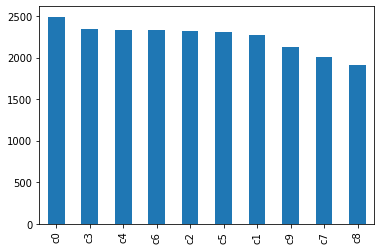

In [6]:
class_counts = data.classname.value_counts()

class_counts.plot(kind = 'bar')

In [7]:
IMG_SIZE = (224 ,224)
BATCH_SIZE = 64

In [8]:
train_gen = ImageDataGenerator(width_shift_range = 0.3,
                               height_shift_range = 0.3,
                               shear_range = 0.3,
                               zoom_range = 0.4,
                               validation_split = 0.2)

test_gen = ImageDataGenerator()

In [9]:
train_data = train_gen.flow_from_directory(train_dir,
                                         target_size=IMG_SIZE,
                                         batch_size=BATCH_SIZE,
                                         subset='training',
                                         seed = 42)

Found 17943 images belonging to 10 classes.


In [10]:
val_data = train_gen.flow_from_directory(train_dir,
                                         target_size=IMG_SIZE,
                                         batch_size=BATCH_SIZE,
                                         subset='validation',
                                         seed = 42)

Found 4481 images belonging to 10 classes.


In [11]:
def model(num_class):
    inputs = Input(shape=(224,224,3))
    base = EfficientNetB3(include_top = False,
                         weights='imagenet')(inputs)
    x = GlobalAveragePooling2D()(base)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    outputs = Dense(num_class , activation='softmax')(x)
    
    model = Model(inputs = inputs , outputs = outputs)
    model.compile(loss = 'categorical_crossentropy',
                 optimizer = tf.optimizers.Adam(1e-4),
                 metrics = ['accuracy'])
    return model

In [12]:
num_class = len(class_counts )
num_class

10

In [13]:
model = model(num_class)
model.summary()

2023-01-28 14:04:08.899223: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


43950080/43941136 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb3 (Functional)  (None, None, None, 1536)  10783535  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1536)              6144      
_________________________________________________________________
dropout (Dropout)            (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                15370     
Total params: 10,805,049
Trainable params: 10,714,674
Non-trai

In [14]:
ck = ModelCheckpoint('best_model.hdf5' , save_best_only=True,monitor='val_loss',mode='min')
es = EarlyStopping(monitor = 'val_loss', patience = 5)


In [15]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15583424321166756029
]


In [16]:
 tf.config.list_physical_devices('GPU')

[]

In [17]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
history = model.fit(train_data , 
                   epochs = 5 ,
                   validation_data = val_data ,
                   callbacks=[es,ck],
                   verbose = 1)

2023-01-28 14:05:45.917076: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
281/281 [==============================] - 3185s 11s/step - loss: 0.9058 - accuracy: 0.7089 - val_loss: 0.2278 - val_accuracy: 0.9389


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/5
281/281 [==============================] - 3158s 11s/step - loss: 0.1998 - accuracy: 0.9364 - val_loss: 0.1210 - val_accuracy: 0.9612
Epoch 3/5
281/281 [==============================] - 3146s 11s/step - loss: 0.1264 - accuracy: 0.9604 - val_loss: 0.0813 - val_accuracy: 0.9757
Epoch 4/5
281/281 [==============================] - 3146s 11s/step - loss: 0.0907 - accuracy: 0.9713 - val_loss: 0.0606 - val_accuracy: 0.9808
Epoch 5/5
124/281 [============>.................] - ETA: 27:05 - loss: 0.0821 - accuracy: 0.9752

In [ ]:
test_dir = os.path.join(dir , 'imgs')
test_data = test_gen.flow_from_directory(test_dir ,
                                        target_size=IMG_SIZE,
                                        batch_size=BATCH_SIZE,
                                        classes = ['test'],
                                        shuffle = False)
